<script>
  jQuery(document).ready(function($) {

  $(window).load(function(){
    $('#preloader').fadeOut('slow',function(){$(this).remove();});
  });

  });
</script>

<style type="text/css">
  div#preloader { position: fixed;
      left: 0;
      top: 0;
      z-index: 999;
      width: 100%;
      height: 100%;
      overflow: visible;
      background: #fff url('http://preloaders.net/preloaders/720/Moving%20line.gif') no-repeat center center;
  }

</style>

<div id="preloader"></div>

# Importing the data and building the dataframe

This notebook assumes that the Electrona_uTracer_Importer_toCSV.py was  executed on a folder containing uTracer files, and the resulting data was saved as "master_tube_list.csv" in the script's root directory.

In [207]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set(color_codes=True)

# Read CSV file and build dataframe
df = pd.read_csv('/Users/rrmc/PycharmProjects/Electrona_uTracer/master_tube_list.csv')

# Make a list of all the columns
cols = df.columns.tolist()

# Make two new lists, separating the voltage values from the other strings.
# Also, convert the voltages to absolute value ints, so they can be numerically sorted 
voltages = []
other_stuff = []
for i in cols:
    if i.startswith('-'):
        i = int(i[1:])
        voltages.append(i)
    else:
        other_stuff.append(i)

# Sort the voltages numerically
voltages.sort()

# Make a new list to hold the voltages and the other_stuff, properly ordered.
cols_sorted = []

# Add the '-' sign back in to all the voltages and convert to strings, now that they're sorted.
voltages_sorted = []
for i in voltages:
    i = '-' + str(i)
    voltages_sorted.append(i)
    
# Re-order the other_stuff to the desired order    
other_stuff[0], other_stuff[1], other_stuff[2] = other_stuff[1], other_stuff[2], other_stuff[0]    

# Stitch the two separte lists together to form the cols_sorted list.
cols_sorted = other_stuff + voltages_sorted  

# Redefine df with the sorted column list
df = df[cols_sorted]

# Basic Functions
As soon as the CSV file has been read and the dataframe constructed, a series of basic functions should be executed to display interesting information about the data.

### Sample tube data

In [208]:
df.head()

,tube_ID,tube_type,anode_voltage,-2,-6,-10,-14,-18,-22,-26,-30,-34,-38,-42,-46,-50
0,1,5749,325,99.278,65.383,44.717,34.082,26.669,20.931,16.492,12.992,10.291,8.230,6.669,5.495,4.626
1,10,5749,325,84.662,55.752,37.500,27.666,20.873,15.840,12.088,9.304,7.261,5.807,4.747,3.945,3.344
2,11,5749,325,57.956,39.019,26.465,19.832,14.986,11.210,8.358,6.284,4.834,3.863,3.220,2.752,2.418
3,12,5749,325,85.883,52.717,33.817,24.600,18.367,13.795,10.481,8.071,6.345,5.144,4.268,3.592,3.043
4,13,5749,325,90.664,57.346,37.541,27.686,21.015,16.003,12.239,9.433,7.395,5.967,4.977,4.267,3.759


### Show the basic statistics of the tube data

In [209]:
df_stats = df.describe()
df_stats = df_stats[voltages_sorted]
df_stats

,-2,-6,-10,-14,-18,-22,-26,-30,-34,-38,-42,-46,-50
count,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000
mean,84.799673,54.311041,36.111408,26.890265,20.579020,15.856878,12.301735,9.640918,7.677776,6.246265,5.190184,4.378469,3.770286
std,9.698785,6.042972,4.372425,3.511439,3.065207,2.746162,2.472266,2.223436,1.987546,1.758411,1.545969,1.361598,1.225021
min,55.209000,38.328000,25.882000,19.516000,14.487000,10.815000,8.044000,5.992000,4.557000,3.600000,2.975000,2.525000,2.180000
25%,80.152000,51.370000,33.824000,24.949000,18.770000,14.291000,10.876000,8.414000,6.599000,5.211000,4.268000,3.592000,3.043000
50%,86.052000,54.921000,36.069000,26.743000,20.632000,15.688000,12.030000,9.304000,7.318000,5.906000,4.889000,4.090000,3.487000
75%,90.054000,57.685000,38.138000,28.520000,21.656000,17.533000,14.101000,11.081000,8.787000,7.086000,5.857000,4.969000,4.293000
max,100.431000,65.603000,46.996000,36.666000,30.080000,25.292000,21.460000,18.384000,15.898000,13.867000,12.198000,10.760000,9.616000


### Plot the Min, Mean, and Max

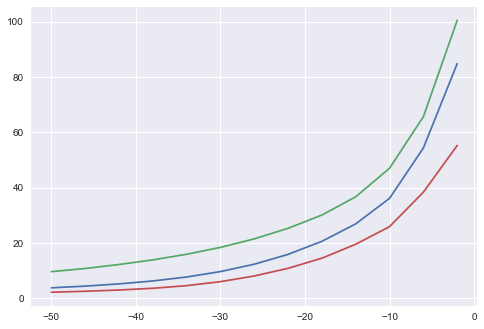

In [210]:
# Extract the Min, Mean, and Max values from the dataset and plot them to show the range of values
df_mean = df_stats.loc['mean']
df_max = df_stats.loc['max']
df_min = df_stats.loc['min']
sns.plt.plot(df_mean)
sns.plt.plot(df_max)
sns.plt.plot(df_min)
sns.plt.show()

### OBSERVATION: The Standard Devition gets worse as the bias voltage approaches zero:

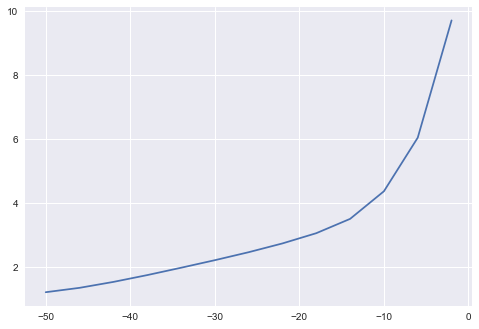

In [211]:
df_std = df_stats.loc['std']
sns.plt.plot(df_std)
sns.plt.show()

### A scatter plot of all the tubes

In [212]:
sns.set_style("darkgrid")
tube_mean = df_stats[1:2]
print(type(tube_mean))


<class 'pandas.core.frame.DataFrame'>


### Plot a series of histograms showing the distribution of currents at each bias point

In [213]:
# # Plot each bias voltage column as a histogram
# dict_of_series_objects_to_plot = {}
# for i in enumerate(cols):
#     if str(i[1]).startswith('-') == True:
#         series_name = i[1]
#         templist = df[df.columns[i[0]]]
#         dict_of_series_objects_to_plot.update({i[1]: templist})
#     else:
#         pass

# for i in list(dict_of_series_objects_to_plot.keys()):
#     s = dict_of_series_objects_to_plot.get(i)
#     s.hist()
#     title = "Grid Voltage = " + i
#     plt.title(title)
# #     plt.show()
#     plt.plot(s)
# #     plt.show()
    
# #     ax = df.plot(lw=2,colormap='jet',marker='.',markersize=10,title='Grid Voltage')
# #     ax.set_xlabel("x label")
# #     ax.set_ylabel("y label")
    
# # s = df[df.columns[0]]    
# # s.hist

# # s.hist()
# # plt.show()
